In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from tqdm import tqdm
class MNIST_Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)
    def forward(self, x):
        return self.lin(x)

In [14]:
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [15]:
model = MNIST_Logistic_Regression()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [16]:
for images, labels in tqdm(train_loader):

    optimizer.zero_grad()


    x = images.view(-1, 28*28)
    y = model(x)
    loss = criterion(y, labels)

    loss.backward()
    optimizer.step()



100%|██████████| 600/600 [00:07<00:00, 83.40it/s]


In [17]:

correct = 0
total = len(mnist_test)
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1, 28*28)
        y = model(x)

        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())

print(correct/total)


100%|██████████| 100/100 [00:01<00:00, 89.44it/s][A

tensor(0.9033)


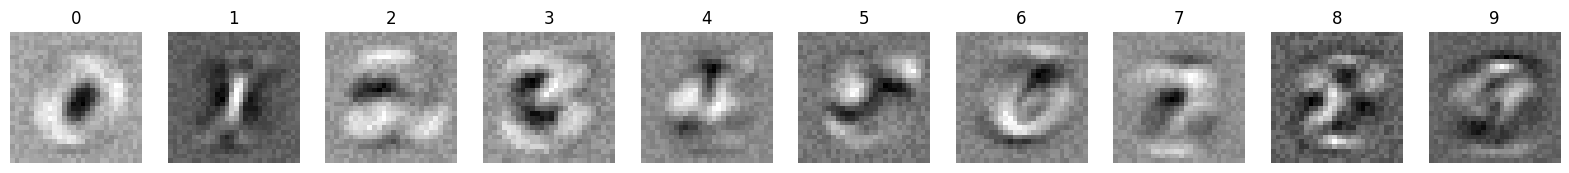

In [18]:
W = model.lin.weight.data  # shape [10, 784]

fig, ax = plt.subplots(1, 10, figsize=(20, 2))

for i in range(10):
    ax[i].imshow(W[i].view(28, 28), cmap='gray')
    ax[i].set_title(str(i))
    ax[i].axis('off')

plt.show()